In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yangrestu","key":"463d48b3434b3e8a2ead2c985d1d8435"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 47.7MB/s]


In [5]:
!mkdir mobile-price-classification
!unzip mobile-price-classification -d mobile-price-classification
!ls mobile-price-classification

Archive:  mobile-price-classification.zip
  inflating: mobile-price-classification/test.csv  
  inflating: mobile-price-classification/train.csv  
test.csv  train.csv


In [6]:
df= pd.read_csv('/content/mobile-price-classification/train.csv')

In [7]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.shape

(2000, 21)

In [10]:
print('test_df missing values: ',df.isna().sum().sum())

test_df missing values:  0


In [11]:
print(np.unique(df['price_range']))

[0 1 2 3]


In [12]:
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [13]:
kbest = SelectKBest(chi2,k=10)

In [14]:
best_feaures = kbest.fit(X,y)

In [15]:
best_feaures = kbest.fit(X,y)

In [16]:
best_feaures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [17]:
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([df_columns,df_features],axis=1)

In [19]:
featureScores.columns = ['Features','Score']

In [20]:
featureScores.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [21]:
X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]

In [22]:
X

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [23]:
X = X.values
y = y.values

In [24]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
y = y.reshape(-1,1)

In [26]:
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [27]:
y = y.toarray()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [29]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 170 (680.00 Byte)
Trainable params: 170 (680.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


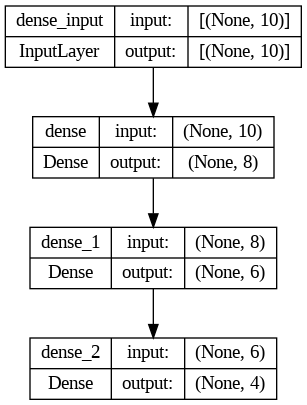

In [30]:
plot_model(model, show_shapes = True)

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')

In [34]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_split=0.1, callbacks=[early_stopping], verbose=2)

Epoch 1/100
45/45 - 0s - loss: 0.0640 - accuracy: 0.9799 - val_loss: 0.0993 - val_accuracy: 0.9625 - 155ms/epoch - 3ms/step
Epoch 2/100
45/45 - 0s - loss: 0.0627 - accuracy: 0.9792 - val_loss: 0.0968 - val_accuracy: 0.9500 - 130ms/epoch - 3ms/step
Epoch 3/100
45/45 - 0s - loss: 0.0618 - accuracy: 0.9847 - val_loss: 0.0986 - val_accuracy: 0.9500 - 115ms/epoch - 3ms/step
Epoch 4/100
45/45 - 0s - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.1011 - val_accuracy: 0.9563 - 114ms/epoch - 3ms/step
Epoch 5/100
45/45 - 0s - loss: 0.0611 - accuracy: 0.9840 - val_loss: 0.0994 - val_accuracy: 0.9500 - 109ms/epoch - 2ms/step
Epoch 6/100
45/45 - 0s - loss: 0.0606 - accuracy: 0.9826 - val_loss: 0.0983 - val_accuracy: 0.9625 - 120ms/epoch - 3ms/step
Epoch 7/100
45/45 - 0s - loss: 0.0601 - accuracy: 0.9792 - val_loss: 0.0968 - val_accuracy: 0.9625 - 147ms/epoch - 3ms/step
Epoch 8/100
45/45 - 0s - loss: 0.0598 - accuracy: 0.9840 - val_loss: 0.0967 - val_accuracy: 0.9563 - 121ms/epoch - 3ms/step
Epoch 9/

In [35]:
y_pred = model.predict(X_test)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 4ms/step


In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 96.75


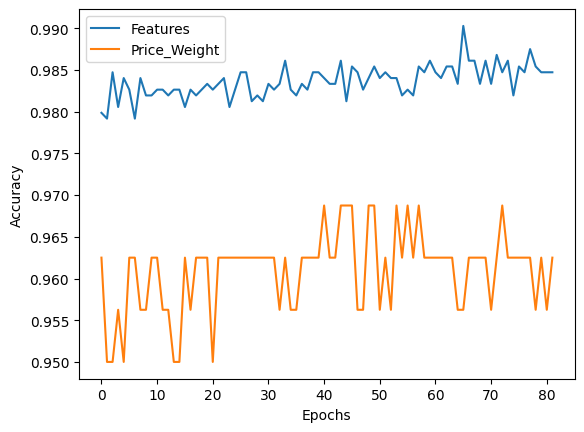

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

In [38]:
keras_file = "mobile.h5"
tf.keras.models.save_model(model, keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("mobile.tflite","wb").write(tfmodel)

<ipython-input-38-1699fae52e8e>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, keras_file)


2772